In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:00<00:00, 194MB/s]
100% 149M/149M [00:00<00:00, 178MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []
  #iterate through directories in training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    for image in os.listdir(label_path):
      image_path = os.path.join(label_path, image)
      classes.append(label)
      class_paths.append(image_path)

  #create the dataframe with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

In [4]:
tr_df = get_class_paths('/content/Training')

In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [6]:
ts_df = get_class_paths('/content/Testing')

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


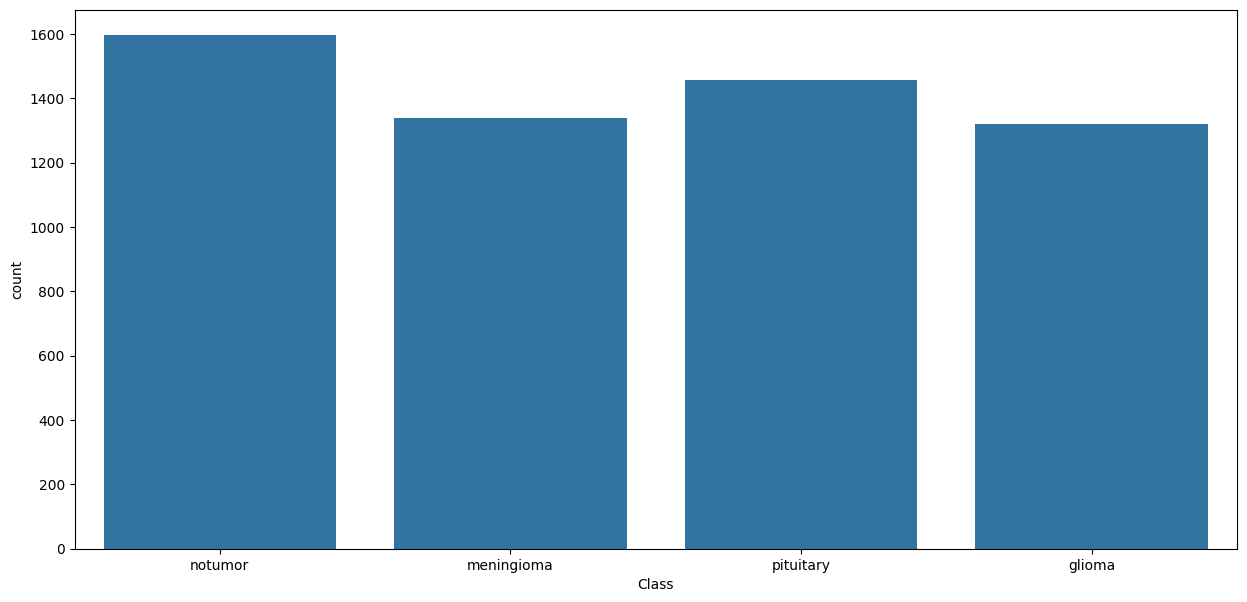

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

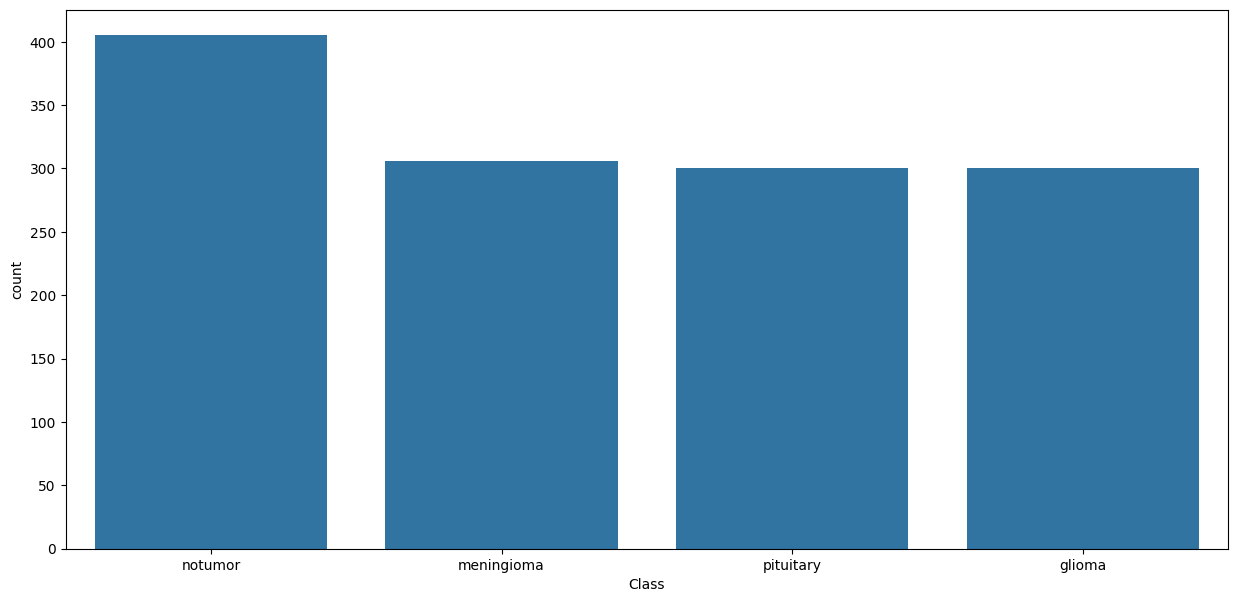

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size = 0.5, stratify = ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
379,/content/Testing/notumor/Te-no_0231.jpg,notumor
515,/content/Testing/meningioma/Te-me_0286.jpg,meningioma
1098,/content/Testing/glioma/Te-gl_0247.jpg,glioma
1120,/content/Testing/glioma/Te-gl_0195.jpg,glioma
236,/content/Testing/notumor/Te-no_0127.jpg,notumor
...,...,...
745,/content/Testing/pituitary/Te-pi_0140.jpg,pituitary
490,/content/Testing/meningioma/Te-me_0134.jpg,meningioma
199,/content/Testing/notumor/Te-no_0063.jpg,notumor
171,/content/Testing/notumor/Te-no_0210.jpg,notumor


In [13]:
ts_df

,Class Path,Class
1291,/content/Testing/glioma/Te-gl_0058.jpg,glioma
715,/content/Testing/pituitary/Te-pi_0270.jpg,pituitary
17,/content/Testing/notumor/Te-no_0011.jpg,notumor
122,/content/Testing/notumor/Te-no_0384.jpg,notumor
510,/content/Testing/meningioma/Te-me_0086.jpg,meningioma
...,...,...
1008,/content/Testing/pituitary/Te-pi_0205.jpg,pituitary
643,/content/Testing/meningioma/Te-me_0093.jpg,meningioma
1220,/content/Testing/glioma/Te-gl_0110.jpg,glioma
910,/content/Testing/pituitary/Te-pi_0166.jpg,pituitary


In [14]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class',
                                             batch_size=batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class',
                                               batch_size=batch_size, target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class',
                                             batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


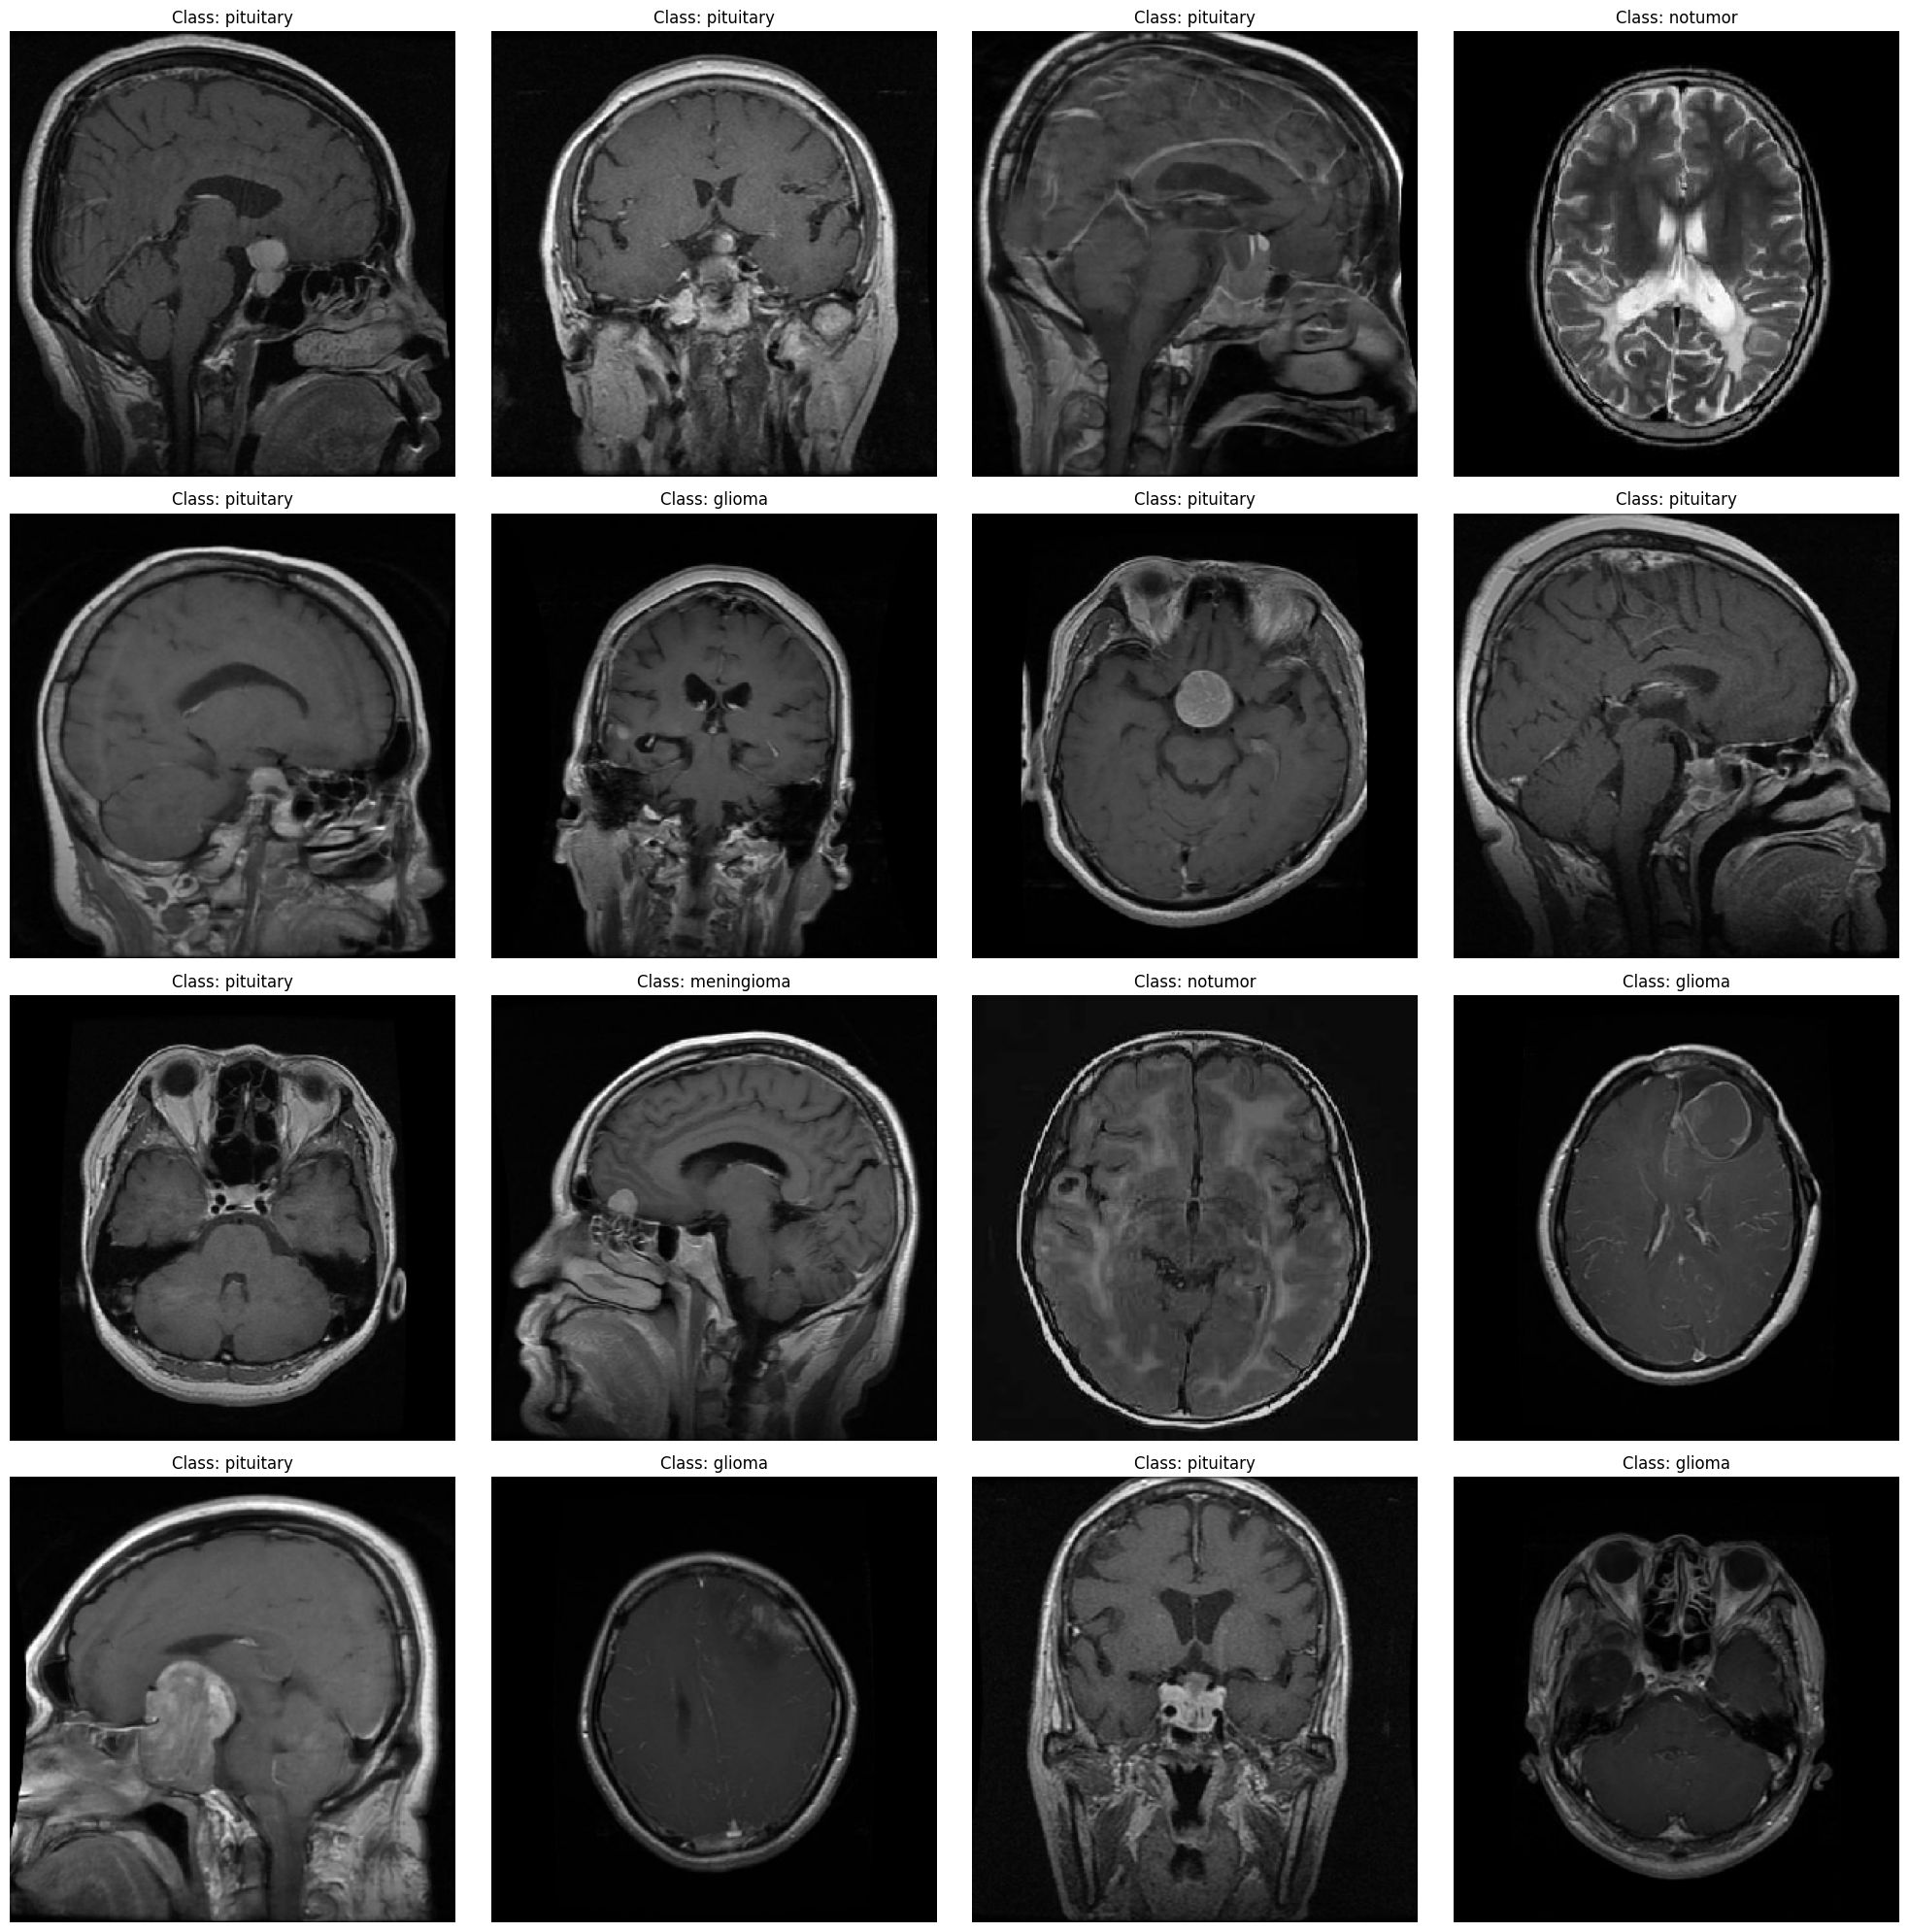

In [16]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices[class_index]

  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top = False,
                                            weights='imagenet',
                                            input_shape=img_shape,
                                            pooling= 'max')
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.compile(Adamax(learning_rate = 0.001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [19]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.5838 - loss: 1.0114 - precision: 0.7465 - recall: 0.3980 - val_accuracy: 0.7924 - val_loss: 0.4941 - val_precision: 0.8113 - val_recall: 0.7679
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 819ms/step - accuracy: 0.9600 - loss: 0.1107 - precision: 0.9632 - recall: 0.9568 - val_accuracy: 0.9405 - val_loss: 0.1606 - val_precision: 0.9519 - val_recall: 0.9359
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 823ms/step - accuracy: 0.9896 - loss: 0.0347 - precision: 0.9900 - recall: 0.9891 - val_accuracy: 0.9573 - val_loss: 0.1193 - val_precision: 0.9572 - val_recall: 0.9557
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 826ms/step - accuracy: 0.9933 - loss: 0.0210 - precision: 0.9939 - recall: 0.9932 - val_accuracy: 0.9863 - val_loss: 0.0442 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.9957 - loss: 0.0143 - precision: 0.9958 - recall: 0.9953 - val_accuracy: 0.9908 - val_loss: 

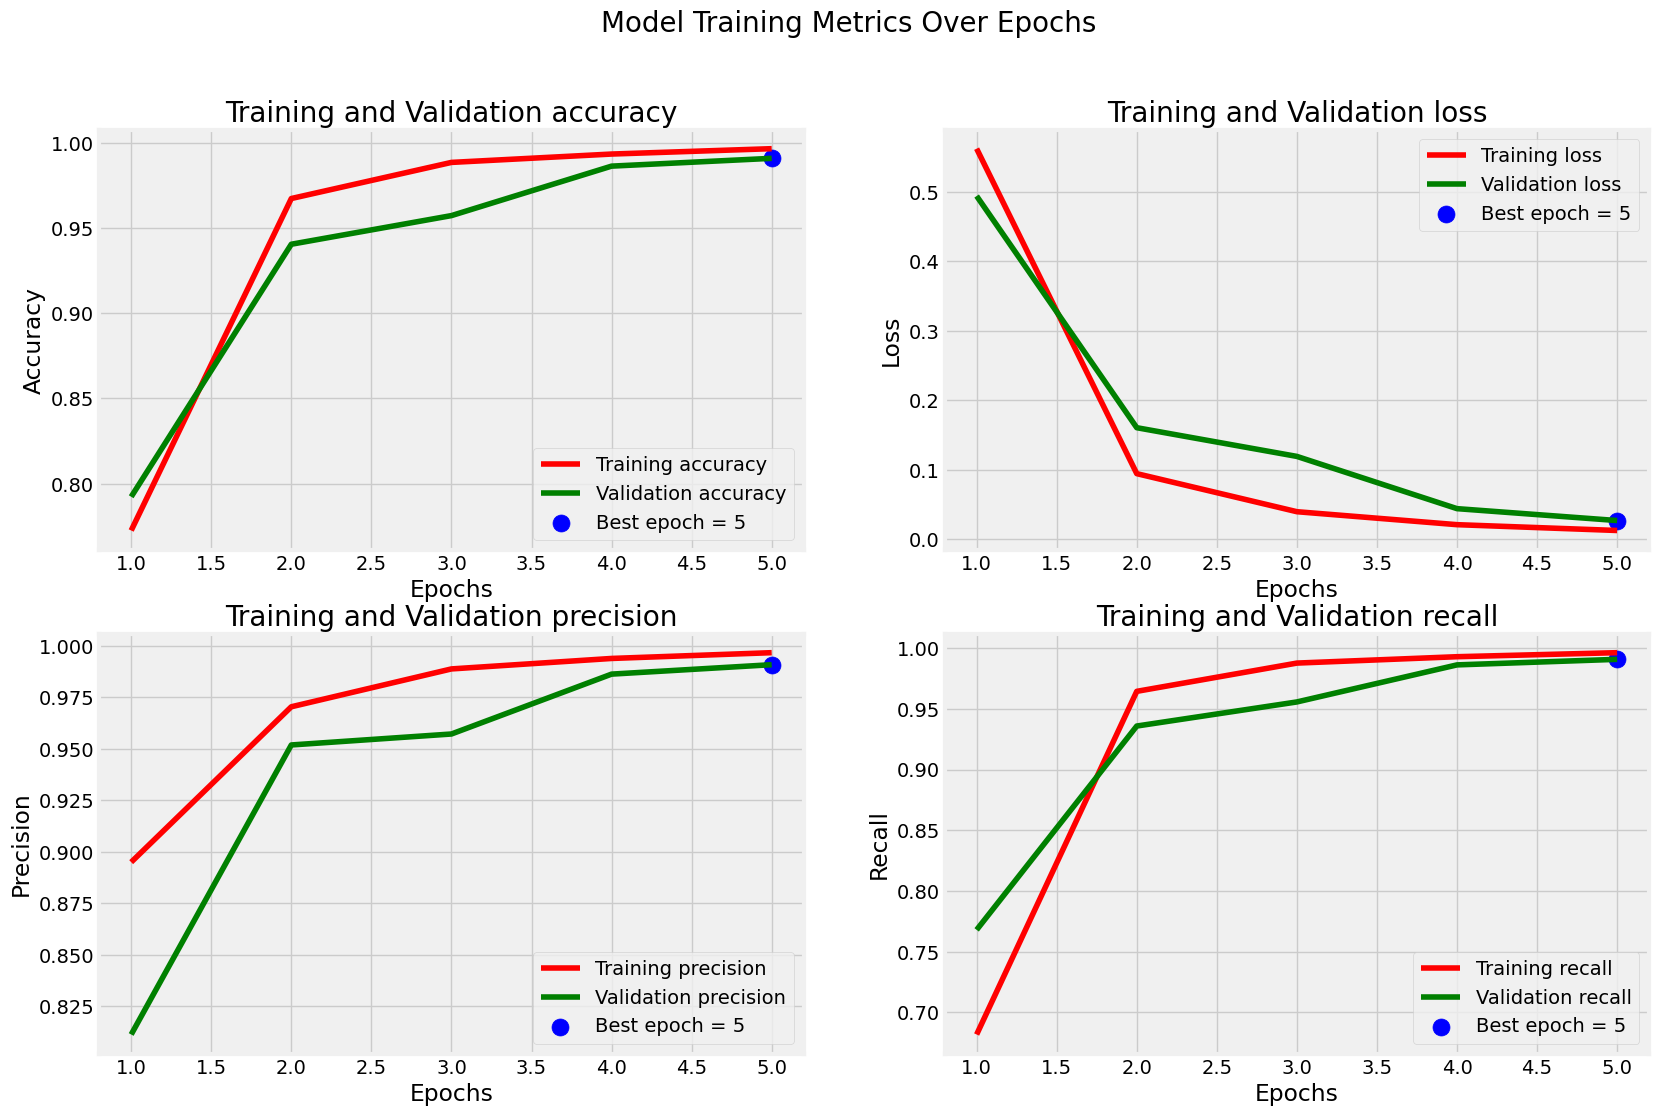

In [20]:
#get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric])+1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=20)
plt.show()

In [21]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]: .4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]: .4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]: .4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.9986 - loss: 0.0053 - precision: 0.9986 - recall: 0.9986
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9864 - loss: 0.0294 - precision: 0.9864 - recall: 0.9864
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 1.0000 - loss: 6.5591e-05 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9822 - loss: 0.0637 - precision: 0.9822 - recall: 0.9822
Train Accuracy: 99.82%
Train Loss:  0.0059


Validation Accuracy: 98.93%
Validation Loss:  0.0330


Test Accuracy: 98.17%
Test Loss:  0.0690


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step


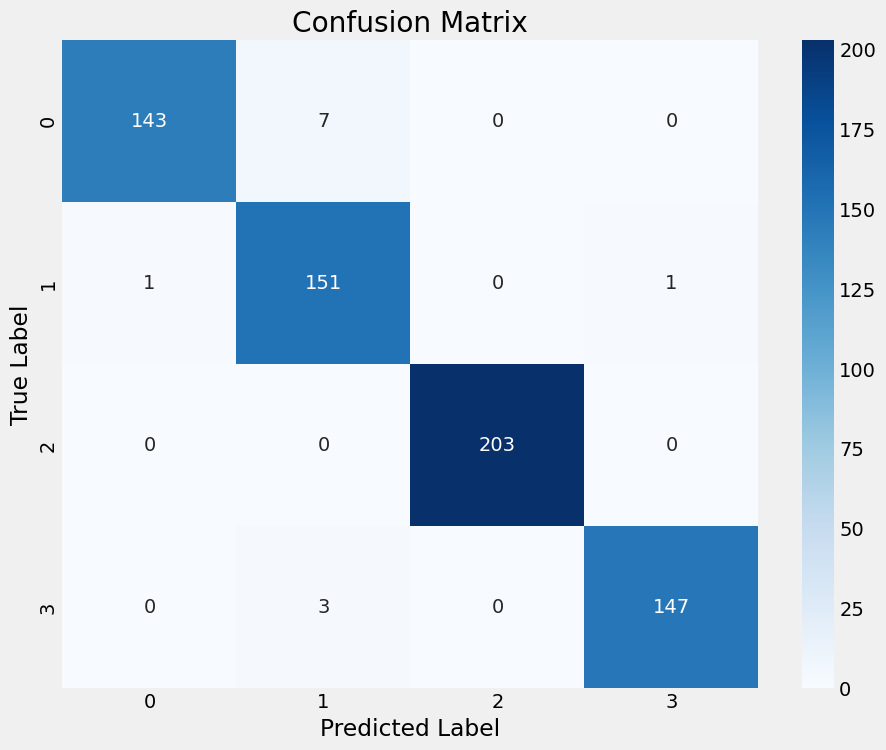

In [22]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no tumor',
    3: 'pituitary'
}

# create and display the confusion matrix

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
from PIL import Image

def predict(img_path: str) -> None:
  #get class labels
  labels = list(class_dict.keys())

  #create figure
  plt.figure(figsize=(6,8))

  #load image and resize
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.array(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255

  #get prediction models
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #get predicted class
  predicted_class_index = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_index]

  #plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image \nPredicted: {predicted_class}")

  #plot probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize = 15)
  plt.title('Class Probabilities')

  #ad probability lavels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()

  print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


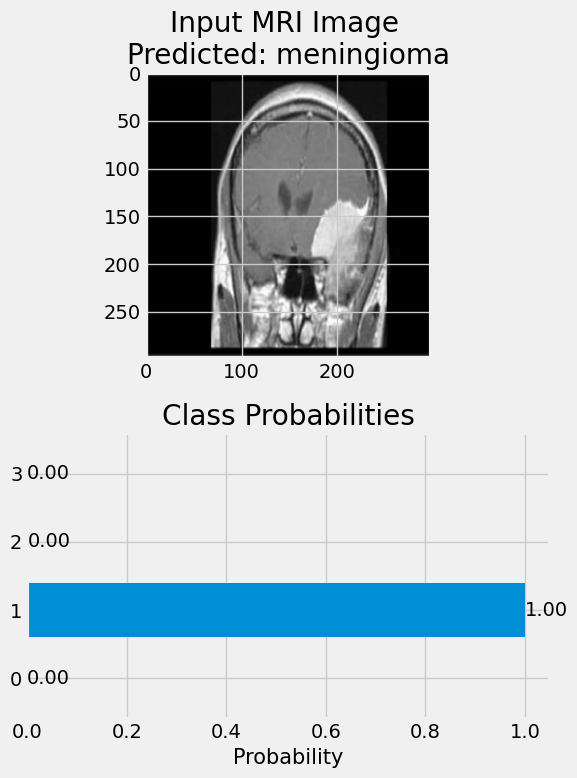

Predicted Class: meningioma


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


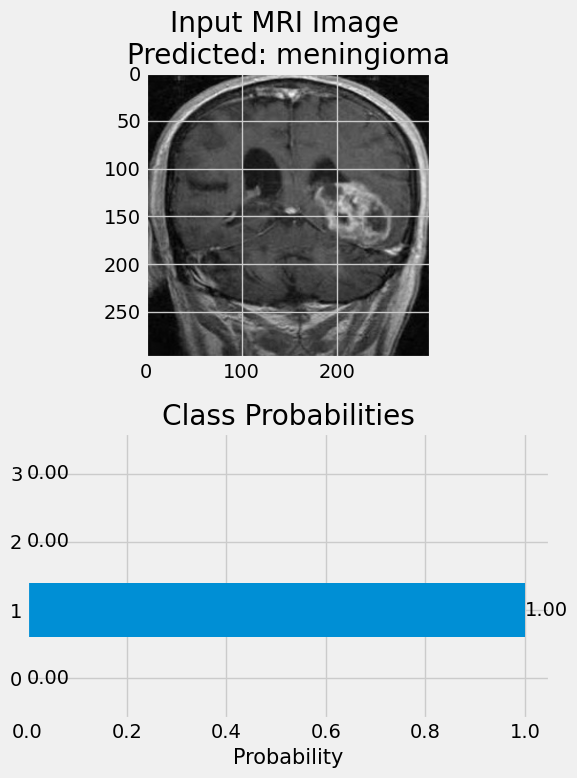

Predicted Class: meningioma


In [25]:
predict("/content/Testing/meningioma/Te-meTr_0007.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


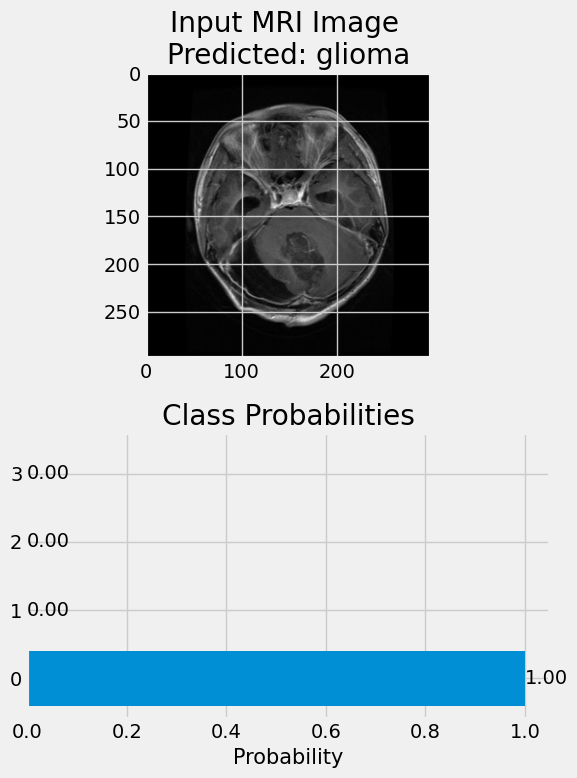

Predicted Class: glioma


In [26]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [27]:
model.save_weights("xception_model.weights.h5")

In [28]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class',
                                             batch_size=batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class',
                                               batch_size=batch_size, target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class',
                                             batch_size=16, target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
cnn_model = Sequential()

#convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#flatten the output for fully connected layers
cnn_model.add(Flatten())

#fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
cnn_model.add(Dropout(rate=0.35))

cnn_model.add(Dense(4, activation='softmax')) # output later with 4 nerurons for the 4 classes

#compile model
cnn_model.compile(Adamax(learning_rate = 0.001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

#display model
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = cnn_model.fit(tr_gen, epochs=7, validation_data=valid_gen)

Epoch 1/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.9153 - loss: 0.3425 - precision_1: 0.9215 - recall_1: 0.9098 - val_accuracy: 0.9130 - val_loss: 0.3581 - val_precision_1: 0.9196 - val_recall_1: 0.9084
Epoch 2/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 299ms/step - accuracy: 0.9282 - loss: 0.3070 - precision_1: 0.9330 - recall_1: 0.9244 - val_accuracy: 0.9191 - val_loss: 0.3207 - val_precision_1: 0.9230 - val_recall_1: 0.9145
Epoch 3/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 293ms/step - accuracy: 0.9512 - loss: 0.2463 - precision_1: 0.9535 - recall_1: 0.9489 - val_accuracy: 0.9466 - val_loss: 0.2561 - val_precision_1: 0.9479 - val_recall_1: 0.9435
Epoch 4/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 292ms/step - accuracy: 0.9580 - loss: 0.2316 - precision_1: 0.9612 - recall_1: 0.9572 - val_accuracy: 0.9542 - val_loss: 0.2282 - val_precision_1: 0.9571 - val_recall_1: 0.9542
Epoch 5/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 291ms/step - accuracy: 0.9669 - loss: 0.2070 - precision_1: 0.9674 - rec

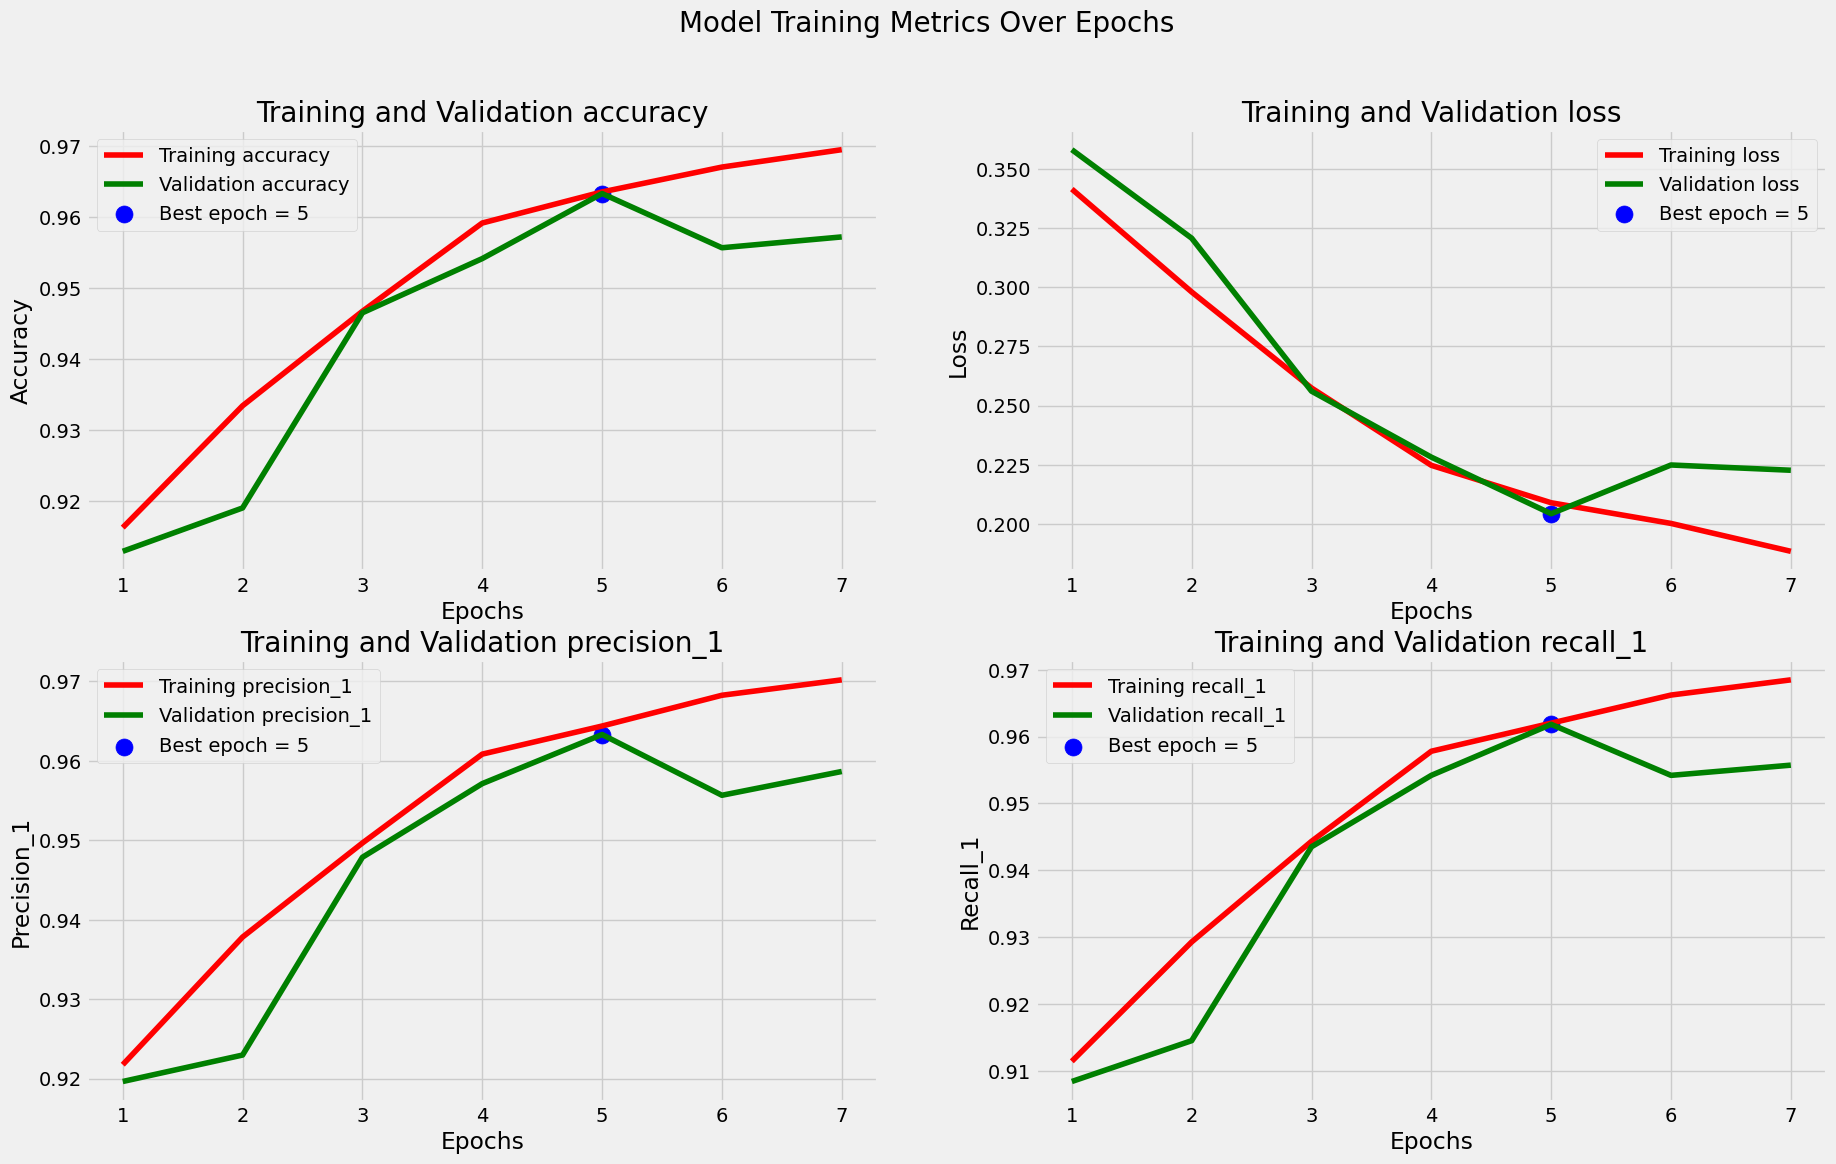

In [36]:
#get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric])+1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=20)
plt.show()

In [37]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]: .4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]: .4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]: .4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9855 - loss: 0.1499 - precision_1: 0.9860 - recall_1: 0.9845
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9741 - loss: 0.2002 - precision_1: 0.9744 - recall_1: 0.9731
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9325 - loss: 0.3063 - precision_1: 0.9335 - recall_1: 0.9325
Train Accuracy: 98.42%
Train Loss:  0.1524


Validation Accuracy: 96.18%
Validation Loss:  0.2196


Test Accuracy: 92.84%
Test Loss:  0.3103


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


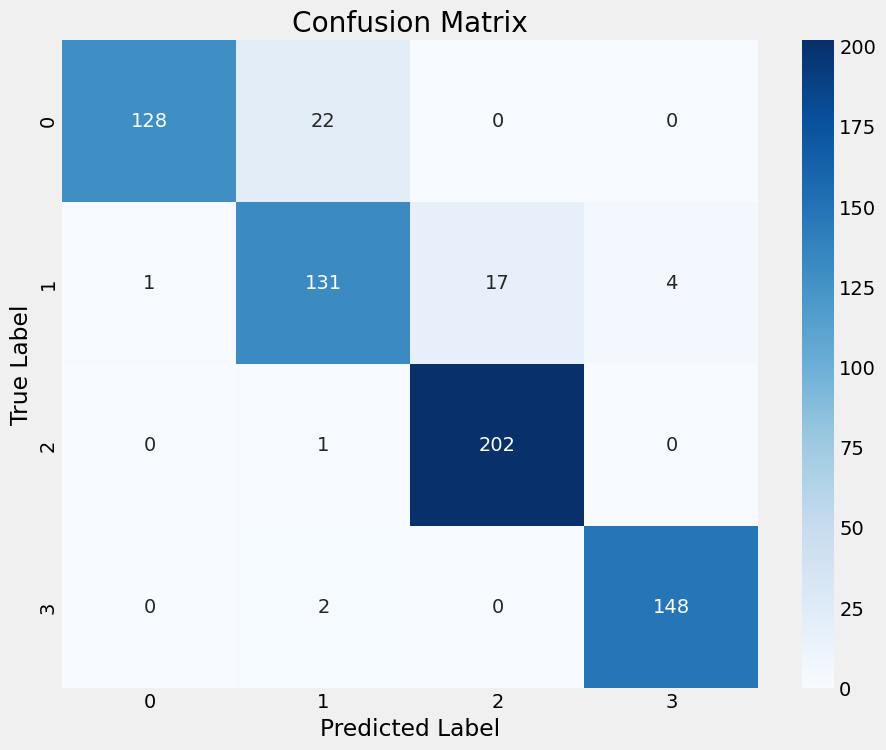

In [38]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no tumor',
    3: 'pituitary'
}

# create and display the confusion matrix

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       150
           1       0.84      0.86      0.85       153
           2       0.92      1.00      0.96       203
           3       0.97      0.99      0.98       150

    accuracy                           0.93       656
   macro avg       0.93      0.92      0.93       656
weighted avg       0.93      0.93      0.93       656



In [40]:
cnn_model.save("cnn_model.h5")

# PART 2 - STREAMLIT WEB APP

In [1]:
! pip install streamlit pyngrok python-dotenv

In [2]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [3]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [4]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [12]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import plotly.graph_objects as go
import cv2
from google.colab import userdata
from google import generativeai
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

generativeai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f""" You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors as either
  glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your explanation/response:
  - Explain what regions of the brain the model is focusing on, based on the saliency mao. Refer to the regions highlighted in light cyan,
  those are the regions where the model is focusing on
  - Explain possible reasons why the model made the prediction it did
  - Don't mention anything like 'The saliency map highlights the region the model is focusing on, which are in light cyan' in
  your explanation.
  - keep your explanation to 5 sentences max
  Let's think step by step about this. Verify step by step
  """

  img = PIL.Image.open(img_path)

  model = generativeai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  #resize gradients to match the original image size
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y,x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  #apply mask to gradients
  gradients = gradients * mask

  #normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #apply higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  #apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11,11), 0)

  #create a heatmap overlap with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #resize heatmap to original image size
  heatmap = cv2.resize(heatmap, img_size)

  #superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  #save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img


def load_xception_model(model_path):
  img_shape = (299,299,3)

  base_model = tf.keras.applications.Xception(include_top = False,
                                            weights='imagenet',
                                            input_shape=img_shape,
                                            pooling= 'max')
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)
  model.load_weights(model_path)

  return model



st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify brain tumor.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xcepetion", "Custom CNN")
  )

  if selected_model == "Transfer Learning - XCepetion":
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299,299)
  else:
    model = load_model("/content/cnn_model.h5")
    img_size = (224,224)

  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  #get class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions: ")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.2f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-contnet: space-between; align-items: center;">
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Predictions</h3>
            <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
              {result}
            </p>
          </div>
          <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
            <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html = True
  )

  #Prepare data for Plotly Chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  #create a plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color =['red' if label == result else 'blue' for label in sorted_labels]
  ))
  fig.update_layout(
      title="Probabilties for Each Class",
      xaxis_title="Probability",
      yaxis_title="Class",
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow = False,
        xanchor='left',
        xshift=5
    )

  #display chart
  st.plotly_chart(fig)


  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [14]:
thread = Thread(target=run_streamlit)
thread.start()

In [15]:
public_url = ngrok.connect(addr='8501', proto="http", bind_tls=True)
print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://12d4-34-125-136-97.ngrok-free.app" -> "http://localhost:8501"


In [13]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://d793-34-125-136-97.ngrok-free.app
Closing tunnel: https://c9f1-34-125-136-97.ngrok-free.app
